<a href="https://colab.research.google.com/github/abahrii/test/blob/main/P2_Netoyage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook du nettoyage des données
Réalisé par : BAHRI Abdelghani

## 1. l'importation des outils / bibliothéques et de la base de données

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import chi2_contingency

import seaborn as sns
import random

import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [ ]:
data= pd.read_csv('products.csv', sep='\t')


In [ ]:
data.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,1.012409e+06,1.012409e+06,0.0,0.0,2.780230e+05,0.0,447688.000000,447688.000000,0.0,447688.000000,...,9272.000000,286734.000000,286734.000000,3.000000,0.0,31.000000,4.000000,20.00000,37.000000,15.000000
mean,1.518348e+09,1.540296e+09,NaN,NaN,3.996472e+16,NaN,1.622503,0.027298,NaN,0.071876,...,631.470950,9.216326,8.977878,29.333333,NaN,0.069577,0.090034,4.76000,0.026241,0.046147
std,4.084643e+07,3.135158e+07,NaN,NaN,2.107255e+19,NaN,2.349672,0.164886,NaN,0.316540,...,6856.367788,8.809646,9.272506,15.011107,NaN,0.031724,0.179977,4.24145,0.027702,0.145485
min,0.000000e+00,1.333873e+09,NaN,NaN,0.000000e+00,NaN,0.000000,0.000000,NaN,0.000000,...,0.049000,-15.000000,-15.000000,14.000000,NaN,0.008000,0.000016,0.40000,0.001350,0.006500
25%,1.489093e+09,1.525678e+09,NaN,NaN,2.800000e+01,NaN,0.000000,0.000000,NaN,0.000000,...,111.000000,2.000000,1.000000,22.000000,NaN,0.056500,0.000038,3.50000,0.006900,0.007050
50%,1.524766e+09,1.552167e+09,NaN,NaN,4.900000e+01,NaN,1.000000,0.000000,NaN,0.000000,...,335.870000,10.000000,9.000000,30.000000,NaN,0.069000,0.000060,4.00000,0.022000,0.008500
75%,1.550666e+09,1.563619e+09,NaN,NaN,1.130000e+02,NaN,2.000000,0.000000,NaN,0.000000,...,616.142500,16.000000,17.000000,37.000000,NaN,0.089000,0.090056,5.20000,0.027600,0.011000
max,1.571963e+09,1.571964e+09,NaN,NaN,1.111111e+22,NaN,38.000000,3.000000,NaN,6.000000,...,656298.600000,40.000000,40.000000,44.000000,NaN,0.130000,0.360000,21.50000,0.150000,0.572000


# 2. Nettoyage des données
Le nettoyage des données consiste à traiter et interpoler les valeurs NAN, et détérminer les Outliers et les traiter aussi.

### a) Traitement des valeurs NAN!
J'ai décidé d'enlever tous les éléments avec plus de 60% de valeur NAN

In [ ]:
Moyenne_nulls = data.isnull().mean(axis=0)
c = []
for i in range(0,len(Moyenne_nulls)):
    if Moyenne_nulls[i] < 0.6:
        templist = list(Moyenne_nulls[Moyenne_nulls==Moyenne_nulls[i]].index)
        for i in range (0,len(templist)):
            c.append(templist[i])
consistants = list(set(c))
data_consist = data.loc[:,lambda df: consistants]

Ensuite, j'ai enlevé tout les champs dont j'en aurai pas besoin pendant l'analyse des additifs nutritionnels

In [ ]:
inutile = ["code","url","states_en", "countries_tags","brands","image_url",
          "last_modified_datetime","creator","additives_tags","pnns_groups_2",
          "states","states_tags","ingredients_text","created_datetime","pnns_groups_1",
          "serving_size","created_t","nutrition-score-uk_100g","countries","countries_en",
          "last_modified_t","brands_tags","additives_en","image_ingredients_small_url",
          "ingredients_that_may_be_from_palm_oil_n","image_small_url","image_ingredients_url"]
for i in range (0,len(inutile)):
    try:
        consistants.remove(inutile[i])
    except ValueError:
        pass
data_consist = data.loc[:,lambda df: consistants]

In [ ]:
data.drop(data.columns.difference(['product_name','countries','nutrition_grade_fr','states_fr','energy_100g','proteins_100g','sugars_100g','saturated-fat_100g','sodium_100g','ingredients_from_palm_oil_n','additives_n','nutrition-score-fr_100g','fat_100g','fiber_100g','carbohydrates_100g','salt_100g']),1, inplace=True)
data

,product_name,countries,additives_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,Vitória crackers,France,0,NaN,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.400,0.5600,NaN
1,Cacao,France,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sfiudwx,en:France,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sauce Sweety chili 0%,France,0,NaN,88.0,0.0,0.00,4.8,0.4,NaN,0.2,2.040,0.8160,NaN
4,Mini coco,France,0,NaN,251.0,3.0,1.00,10.0,3.0,NaN,2.0,1.150,0.4600,NaN
5,Pistou d'ail des ours,France,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Pain maïs,en:france,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Mendiants,France,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Salade de carottes râpées,France,0,b,134.0,0.3,0.10,5.3,3.9,NaN,0.9,0.420,0.1680,1.0
9,Fromage blanc aux myrtilles,France,0,NaN,540.0,4.9,3.10,16.3,16.3,NaN,4.4,0.250,0.1000,NaN


Pour le remplissage des données manquantes et aberrantes, j'ai mit "Inconnu" pour les champs qui contient du text, et 0 pour les additifs nutritionnels parce que on sait pas s'il est bon ou mauvais pour la santé et utiliser pour améliorer la valeur nutritionnelle

In [ ]:
data["product_name"].fillna("Inconnu",inplace=True)
data["countries"].fillna("Inconnu",inplace=True)

In [ ]:
data["nutrition-score-fr_100g"].fillna("0",inplace=True)
data = data.drop("additives_n",1)
data_cons = data.dropna(axis=0,how='any')

visualiser la consistance des données sur un graphe

Text(0,0.5,'Les données')

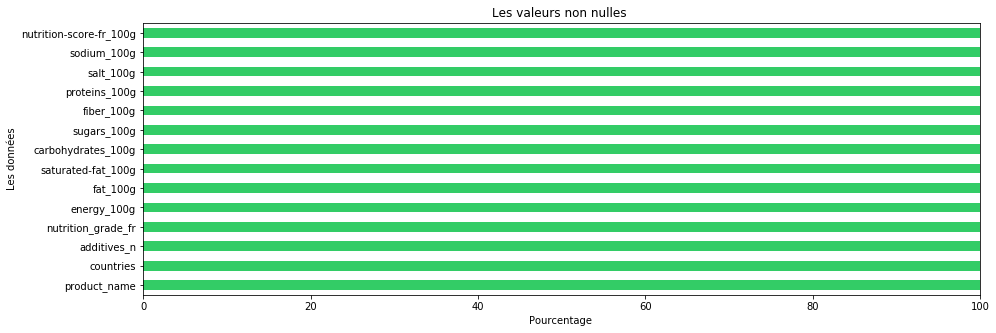

In [ ]:
plt.figure(figsize=(15,5))
(data_cons.notnull().mean(axis=0)*100).plot.barh(color ="#33CC66")
plt.xlim(xmax=100)
plt.title("Les valeurs non nulles ")
plt.xlabel("Pourcentage ")
plt.ylabel("Les données")

### b) Traitement des Outliers

In [ ]:
data_cons.loc[data_cons.energy_100g > 4000, 'energy_100g'] = 4000
data_cons.loc[data_cons.fat_100g > 100, 'fat_100g'] = 100
data_cons.loc[data_cons.carbohydrates_100g > 100, 'carbohydrates_100g'] = 100
data_cons.loc[data_cons.sugars_100g > 100, 'sugars_100g'] = 100
data_cons.loc[data_cons.sugars_100g < 0, 'sugars_100g'] = 0
data_cons.loc[data_cons.fiber_100g > 100, 'fiber_100g'] = 100
data_cons.loc[data_cons.salt_100g > 100, 'salt_100g'] = 100
data_cons.loc[data_cons.sodium_100g > 100, 'sodium_100g'] = 100
data_cons.loc[data_cons.proteins_100g >100, 'proteins_100g'] = 100
data_cons.loc[data_cons.proteins_100g < 0, 'proteins_100g'] = 0

In [ ]:
data_c=data_cons.to_csv('cleaned.csv', sep='\t')